In [1]:

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Filling the missing values using mean

In [6]:
df.fillna({"ph":df['ph'].mean(),"Sulfate":df['Sulfate'].mean(),"Trihalomethanes":df['Trihalomethanes'].mean()},inplace=True)

In [7]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080795,1.469956,0.000000,6.277673,7.080795,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.775777,36.142612,129.000000,317.094638,333.775777,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.396293,15.769881,0.738000,56.647656,66.396293,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


Correlation between attributes of dataset

<Axes: >

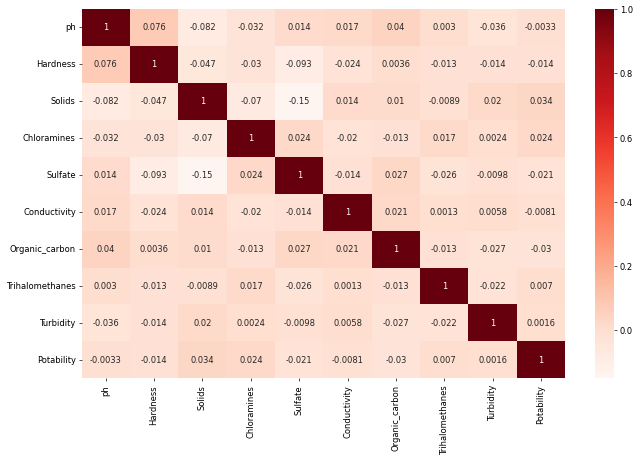

In [9]:
corr = df.corr()
plt.figure(figsize=(13,8), dpi = 60)
sns.heatmap(corr,cmap="Reds",annot=True)

Pie chart presentation of potability of water

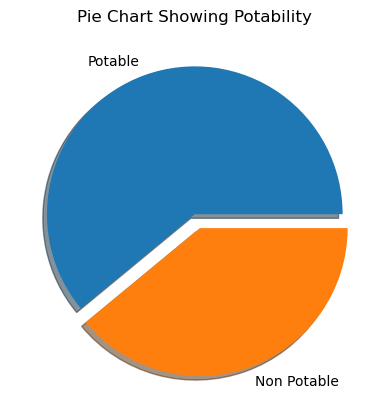

In [10]:
plt.pie(x=df["Potability"].value_counts(), 
        labels=["Potable","Non Potable"], 
        shadow = True, 
        explode = (0, 0.1)
        )
plt.title("Pie Chart Showing Potability")
plt.show()

Histogram representation of attributes

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

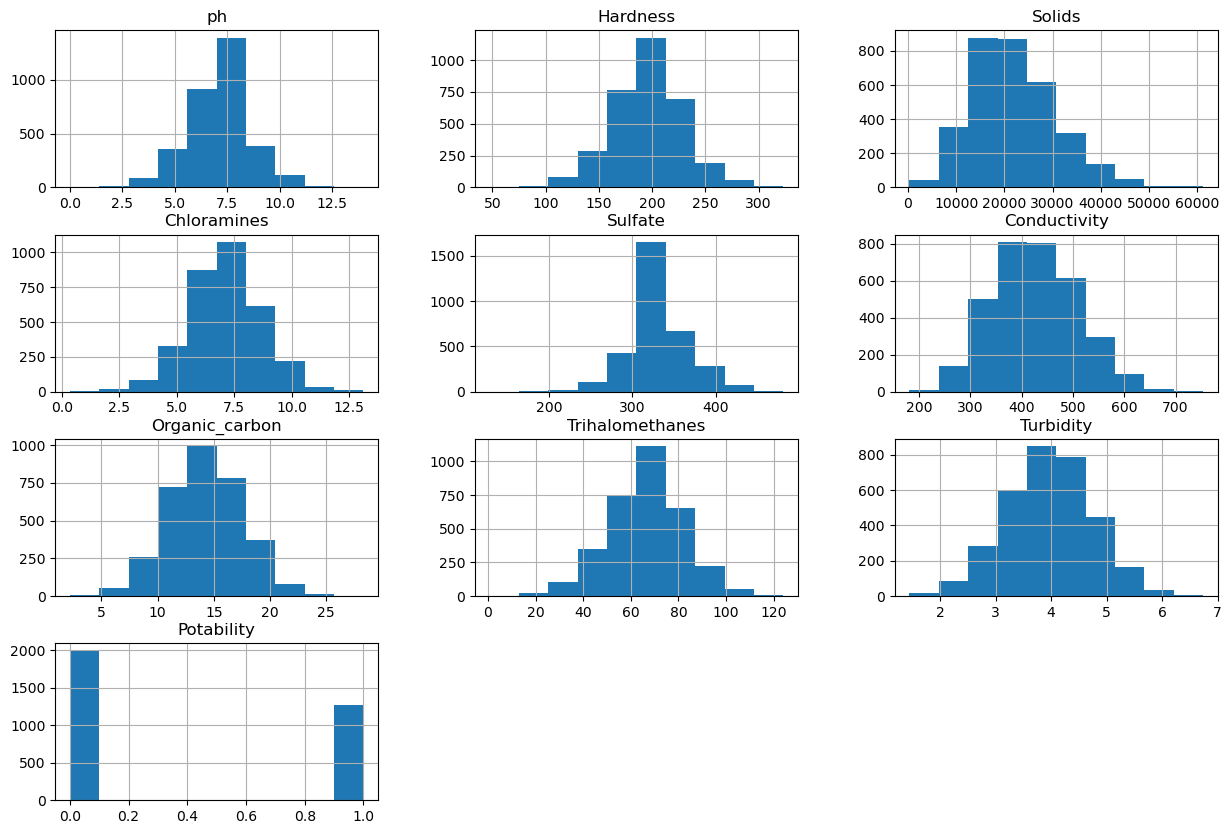

In [11]:
df.hist(figsize=(15, 10))

Split and test data

In [12]:
X = df.drop('Potability',axis=1)
y = df['Potability']



In [13]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Train and test by Naive Bayes

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=10)

In [15]:
gb = GaussianNB()

In [16]:
gb.fit(X_train, y_train)

GaussianNB()

In [17]:
predict = gb.predict(X_test)

In [18]:
print("Accuracy Score :",accuracy_score(predict,y_test))

Accuracy Score : 0.6463414634146342


Normalise

In [19]:
features_scaler = MinMaxScaler()
features = features_scaler.fit_transform(X)
features

array([[0.50577104, 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.5341137 , 0.63247754,
        0.16244074]])

In [20]:
clf = BernoulliNB()
clf.fit(X_train, y_train)


BernoulliNB()

In [21]:
predict = clf.predict(X_test)


In [22]:
print("Accuracy Score :",accuracy_score(predict,y_test))

Accuracy Score : 0.6265243902439024


Train and test by Decision Tree

In [23]:
clf_DT = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [24]:
pred1 = clf_DT.predict(X_test)
accuracy_score(pred1,y_test)

0.6478658536585366

Random Forest, Logistic Regression and KNN

In [25]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,7,11,13]
        }
    }  
}

In [33]:
#Cross validation
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(features, y)
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_param': clf.best_params_
  })
  water_score = pd.DataFrame(scores,columns=['model','best_score','best_param'])
  water_score

In [35]:
model =RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
print('Random Forest Estimation',model.score(X_test,y_test)*100)

Random Forest Estimation 68.4451219512195


In [37]:
import pickle
filename = "random_for.sav"
pickle.dump(model,open(filename,'wb'))